
**The discretized Geometric Brownian Motion (GBM) formula is:**

$$
S_{t+\Delta t} = S_t \cdot \exp\left[\left(\mu - \frac{1}{2} \sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} \cdot Z_t\right]
$$

where:

$$
\begin{aligned}
S_{t+\Delta t} &:\ \text{Stock price at the next time step} \\
S_t &:\ \text{Stock price at the current time step} \\
\mu &:\ \text{Expected return (drift),mean} \\
\sigma &:\ \text{Volatility of returns, standard deviation}\\
\Delta t &:\ \text{Time increment (e.g., } \frac{1}{252} \text{ for daily)} \\
Z_t &\sim \mathcal{N}(0, 1):\ \text{Standard normal random variable (new draw each step)}
\end{aligned}
$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
STOCK_TICKER='AAPL'
Days_for_estimation=252
future_years_to_simulate=1
simulations=100

In [3]:
prices=yf.download(STOCK_TICKER,period=f'{Days_for_estimation}d',interval='1d')['Close']

/tmp/ipython-input-3-4170382257.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices=yf.download(STOCK_TICKER,period=f'{Days_for_estimation}d',interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed


In [4]:
log_returns=np.log(prices/prices.shift(1)).dropna()

In [7]:
mu=(log_returns.mean()*252).item()
sigma=(log_returns.std()*np.sqrt(252)).item()
S0=prices.iloc[-1].item()

dt=1/252
num_steps=int(future_years_to_simulate/dt)

Z=np.random.standard_normal((num_steps,simulations))
daily_factors=np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z)
price_paths=np.zeros((num_steps+1,simulations))
price_paths[0,:]=S0

In [9]:
for t in range(1,num_steps+1):
  price_paths[t,:]=price_paths[t-1,:]*daily_factors[t-1,:]

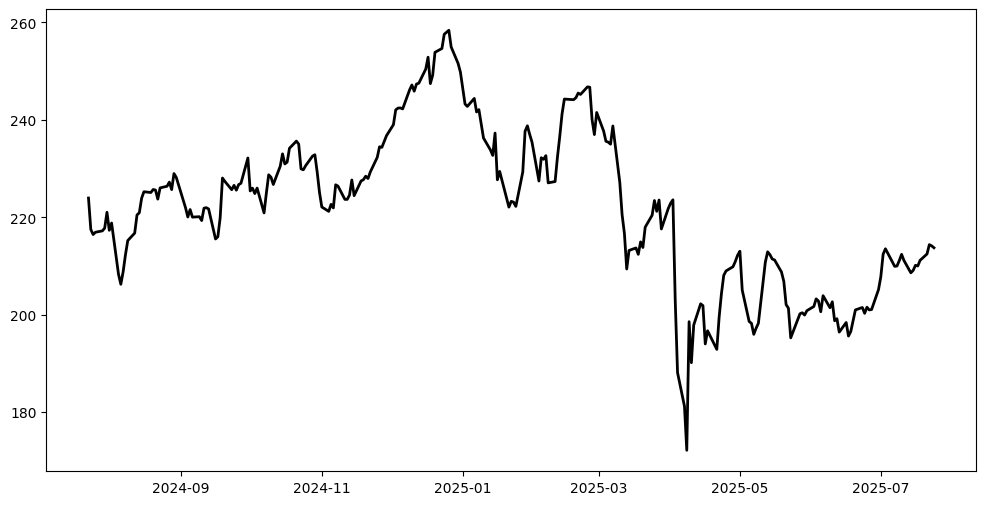

In [10]:
plt.figure(figsize=(12,6))
historical_dates=prices.index
plt.plot(historical_dates,prices,label='Historical Price',color='black',linewidth=2)

In [16]:
prices

Ticker,AAPL
Date,
2024-07-23,223.962585
2024-07-24,217.522705
2024-07-25,216.477615
2024-07-26,216.945419
2024-07-29,217.224121
...,...
2025-07-18,211.179993
2025-07-21,212.479996
2025-07-22,214.399994


In [20]:
pd.DataFrame(price_paths)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,...,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995,213.759995
1,216.674672,214.549850,215.052074,212.461773,218.207130,220.583007,210.008406,216.257822,214.839365,210.827585,...,209.722341,203.580837,217.824876,213.158127,218.505379,213.616335,214.977486,215.976376,213.161019,214.180799
2,210.013940,219.323863,213.236209,209.318732,216.907839,223.055722,209.552582,222.085523,210.039598,210.174170,...,204.888134,203.175651,217.015653,209.516227,221.354509,208.628030,217.403428,218.693339,211.174888,202.872965
3,216.139529,226.656974,211.787278,212.171039,216.763817,222.975570,207.585462,214.001989,206.304810,213.684759,...,201.933283,205.431931,213.971610,207.555709,222.941468,208.408938,215.741497,218.893464,216.163706,202.130696
4,227.411261,224.220850,212.677317,209.755659,214.884082,231.502566,204.810560,215.235417,202.930462,223.501588,...,197.500231,216.277637,217.240839,213.626263,226.991467,211.964433,226.533741,218.352186,220.618868,202.081806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,197.571933,241.726183,121.212835,216.089890,206.824436,184.288888,154.529901,230.684480,138.979735,155.407736,...,135.696652,164.621586,131.039043,247.058663,150.620422,227.331116,185.739817,203.068340,175.185489,253.429611
249,195.694044,242.834297,121.950310,218.830200,204.172348,182.690261,151.269712,232.627663,138.152244,153.824413,...,137.237609,168.172118,128.659641,255.193965,151.655551,230.968546,184.509025,202.290267,175.339678,260.802969
250,195.834537,244.210025,118.605312,215.811081,204.009571,178.079903,152.385204,228.846865,138.301238,148.516840,...,134.551255,170.957828,131.869592,255.025165,153.891860,226.108802,177.913213,201.362457,173.480012,258.021379
251,197.780019,234.280731,116.593921,221.306230,204.426962,176.858610,148.670509,226.852087,136.158824,147.989648,...,136.355603,169.377358,134.563198,254.892667,153.375536,230.024012,178.432729,201.553639,172.286437,255.115165


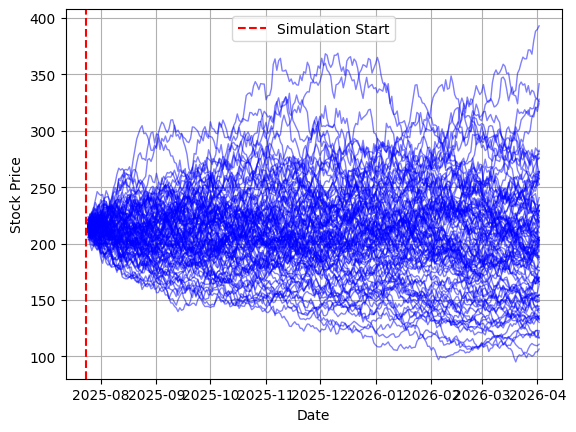

In [15]:
last_historical_date=prices.index[-1]
future_dates=pd.date_range(start=last_historical_date,periods=num_steps+1)[1:]
plt.plot(future_dates,price_paths[1:,:],lw=1,alpha=0.5,color='blue')

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.axvline(last_historical_date,color='red',linestyle='--',label='Simulation Start')
plt.legend()